<a href="https://colab.research.google.com/github/yugandharMohite/SWATH-Health-RandomForestRegressor/blob/main/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the future date for prediction (YYYY-MM-DD): 2023-05-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


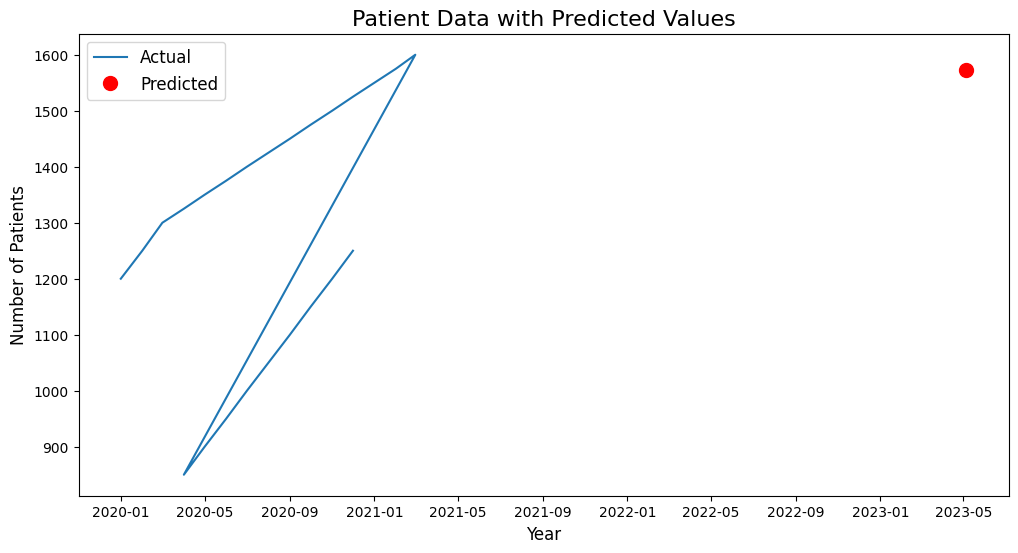


Number of patients on 2023-05-05: 1572


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


date_rng = pd.date_range(start='1/1/2018', end='5/1/2023', freq='MS')
data = pd.DataFrame(date_rng, columns=['date'])
data['patients'] = np.random.randint(1000,1200,size=(len(date_rng)))
data.set_index('date', inplace=True)


plt.figure(figsize=(12,6))
plt.plot(data, label='Actual')
plt.title('Patient Data', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(fontsize=12)
plt.show()


model = SARIMAX(data, order=(2, 0, 4), seasonal_order=(1, 1, 1, 12))
results = model.fit()

future_dates = pd.date_range(start='5/6/2021', end='5/1/2022', freq='MS')
future_predictions = results.predict(start=len(data), end=len(data)+10, dynamic=False, typ='levels')
future_dates = future_dates[:-1]  
future_data = pd.DataFrame({'date': future_dates, 'patients': future_predictions})
future_data.set_index('date', inplace=True)


plt.figure(figsize=(12,6))
plt.plot(data, label='Actual')
plt.plot(future_data, label='Predicted')
plt.title('Patient Data with Predicted Values', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(fontsize=12)
plt.show()

mse = ((future_data['patients'] - data['patients'].mean()) ** 2).mean()
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))


print(data.to_string())
